<a href="https://colab.research.google.com/github/dramirezbe/Signals-Systems-UN-DRB/blob/main/9_Filtros_sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Función de Transferencia del Filtro RC Serie

En el dominio de Laplace, la transferencia del filtro RC serie se representa como:

$$
H(s) = \frac{V_{\text{out}}(s)}{V_{\text{in}}(s)} = \frac{1}{1 + sRC}
$$

Donde:

- $H(s)$: Función de transferencia en el dominio de Laplace.
- $s$: Variable compleja de Laplace ($s = \sigma + j\omega$).
- $R$: Resistencia en ohmios ($\Omega$).
- $C$: Capacitancia en faradios (F).

## Tipos de filtro

### 1. **Filtro Pasa Bajas**
   - La salida $V_{\text{out}}$ se toma en el condensador.
   - Función de transferencia:
     $$
     H_{\text{LPF}}(s) = \frac{1}{1 + sRC}
     $$
   - Frecuencia de corte:
     $$
     \omega_c = \frac{1}{RC}
     $$

### 2. **Filtro Pasa Altas**
   - La salida $V_{\text{out}}$ se toma en la resistencia.
   - Función de transferencia:
     $$
     H_{\text{HPF}}(s) = \frac{sRC}{1 + sRC}
     $$
   - Frecuencia de corte:
     $$
     \omega_c = \frac{1}{RC}
     $$

## Notas
- La frecuencia de corte en radianes ($\omega_c$) puede convertirse a Hz ($f_c$) usando:
  $$
  f_c = \frac{\omega_c}{2\pi}
  $$
- En ambos casos, el comportamiento del filtro depende del término $sRC$, que regula la respuesta a frecuencias específicas.


In [47]:
s = sym.symbols('s', complex=True) #variable simbolica s compleja
t, R, C = sym.symbols('t R C', positive=True) #variables simbolicas positivas
X = sym.Function('X')(s) #Función X(s) dependiente del dominio de s

Y = 1/(R*C*s + 1) * X #Voltaje de salida del circuito
Y

X(s)/(C*R*s + 1)

In [48]:
R_v = 1000 #valores de simulacion de R
C_v =  10e-6 # valores de simulacion de C
Y_RC = Y.subs(R, R_v).subs(C, C_v)
Y_RC

X(s)/(0.01*s + 1)

In [49]:
# Función de Transferencia scipy

num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0.01 1.  ]


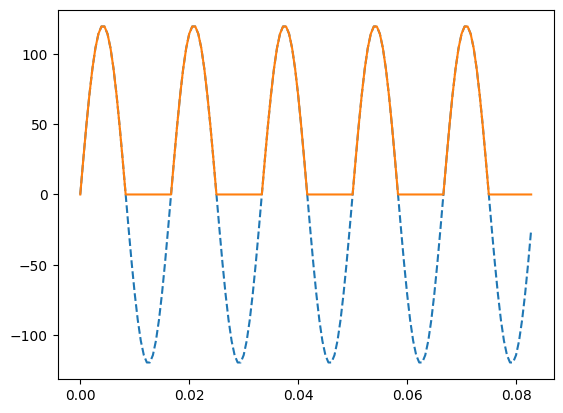

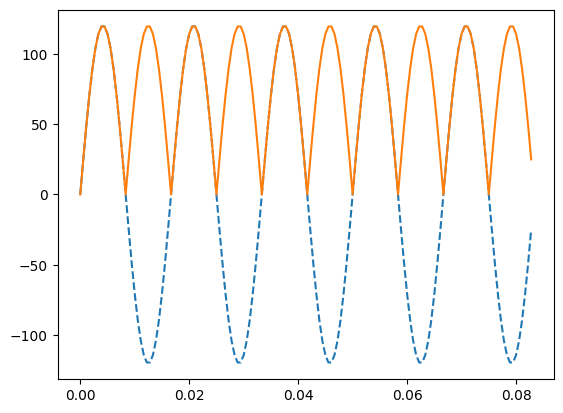

In [50]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
#Para rectificador de media onda:
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec onda completa multiplicar por rec_c
in__ = in_o * rec_m #si se quiere probar con rec media onda multiplicar por rec_m


plt.plot(t,in_o, linestyle="--")
plt.plot(t,in__)
plt.show()

plt.plot(t,in_o, linestyle="--")
plt.plot(t,in_)
plt.show()

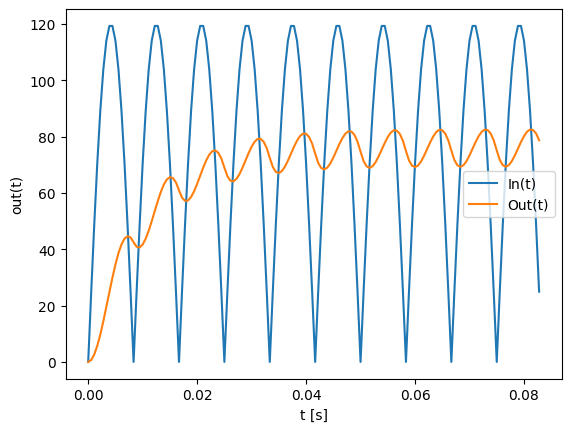

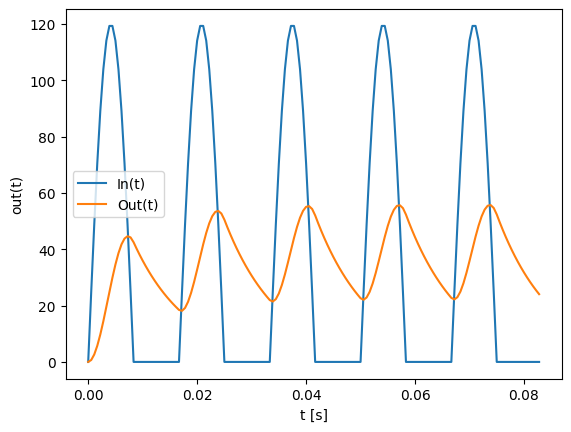

In [51]:
out_ = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy
out__ = G_n.output(in__, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out_,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.legend()
plt.show()

plt.plot(t, in__,label='In(t)')#entrada rectificada
plt.plot(t, out__,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.legend()
plt.show()

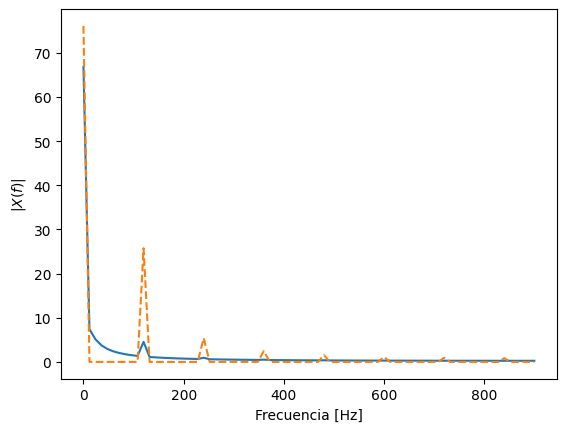

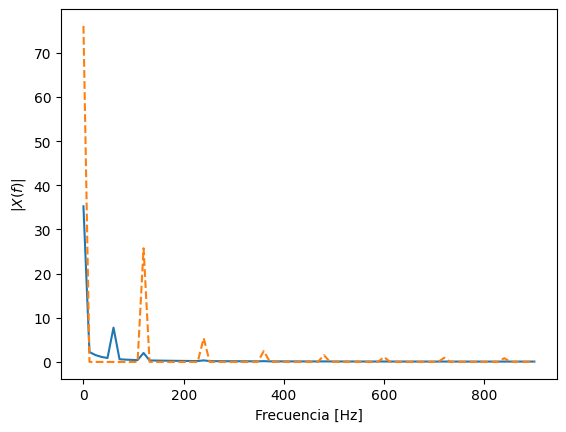

In [52]:
vfre = np.fft.rfftfreq(len(out_),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo

Xf_ = np.fft.rfft(out_)
Xf__ = np.fft.rfft(out__)
Xf = np.fft.rfft(in_)

plt.plot(vfre,abs(Xf_/len(out_)))
plt.plot(vfre,abs(Xf/len(out_)), linestyle="--")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

plt.plot(vfre,abs(Xf__/len(out_)))
plt.plot(vfre,abs(Xf/len(out_)), linestyle="--")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

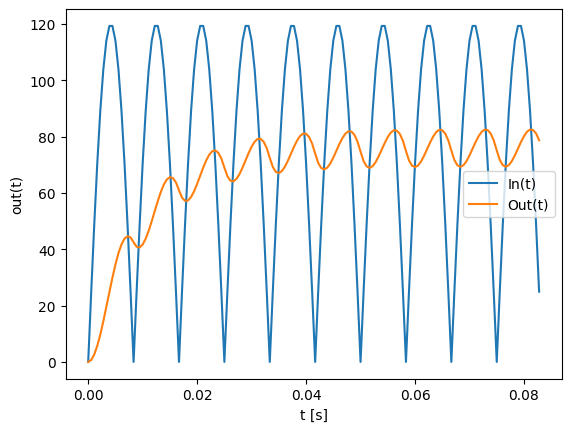

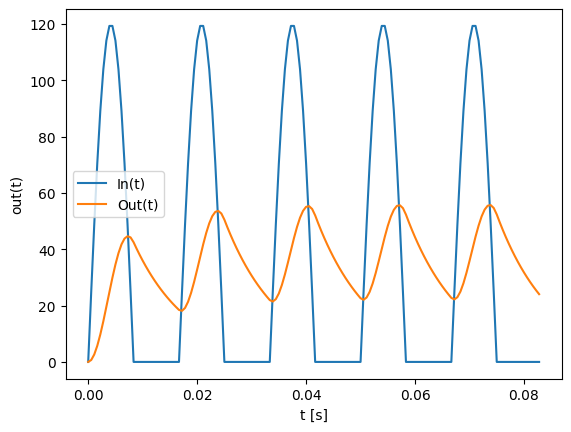

In [57]:
# Modularizar

def transfer_function(num,den, xin, t):
    G_n = sig.TransferFunction(num, den)
    xout = G_n.output(xin, T=t)[1]
    return xout

R_v = 1000 #valores de simulacion de R
C_v =  10e-6 # valores de simulacion de C
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array

Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
t = np.arange(0, 5*To, 1/Fs) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
#Para rectificador de media onda:
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec onda completa multiplicar por rec_c
in__ = in_o * rec_m #si se quiere probar con rec media onda multiplicar por rec_m

xout_ = transfer_function(num,den,in_,t)
xout__ = transfer_function(num,den,in__,t)

plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, xout_,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.legend()
plt.show()

plt.plot(t, in__,label='In(t)')#entrada rectificada
plt.plot(t, xout__,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.legend()
plt.show()


# Fórmula del Filtro RL Serie

## Tipos de filtro

### 1. **Filtro Pasa Bajas**
   - La salida $V_{\text{out}}$ se toma en la inductancia ($L$).
   - Función de transferencia:
     $$
     H_{\text{LPF}}(s) = \frac{\frac{L}{R}}{\frac{L}{R} + s}
     $$
     Simplificando:
     $$
     H_{\text{LPF}}(s) = \frac{1}{1 + s\frac{R}{L}}
     $$
   - Frecuencia de corte:
     $$
     \omega_c = \frac{R}{L}
     $$

### 2. **Filtro Pasa Altas**
   - La salida $V_{\text{out}}$ se toma en la resistencia ($R$).
   - Función de transferencia:
     $$
     H_{\text{HPF}}(s) = \frac{s}{s + \frac{R}{L}}
     $$
   - Frecuencia de corte:
     $$
     \omega_c = \frac{R}{L}
     $$

## Notas
- La frecuencia de corte en radianes ($\omega_c$) puede convertirse a Hz ($f_c$) usando:
  $$
  f_c = \frac{\omega_c}{2\pi}
  $$
- En ambos casos, el comportamiento del filtro depende de la relación entre $s$ y $\frac{R}{L}$, que determina la respuesta a diferentes frecuencias.


In [63]:
s = sym.symbols('s', complex=True) #variable simbolica s compleja
t, L, C = sym.symbols('t L C', positive=True) #variables simbolicas positivas
X = sym.Function('X')(s) #Función X(s) dependiente del dominio de s

Y = 1/((R/L)*s + 1) * X #Voltaje de salida del circuito
Y

X(s)/(1 + R*s/L)

Frecuencai de corte teórica: 0.159154943091895*R/L


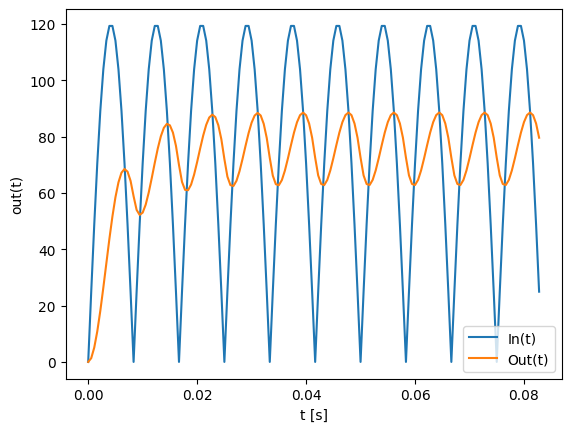

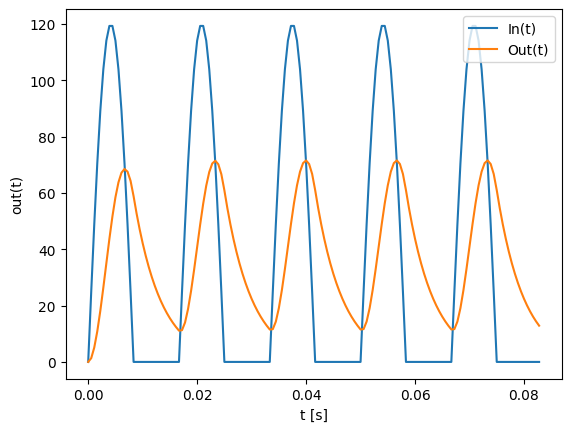

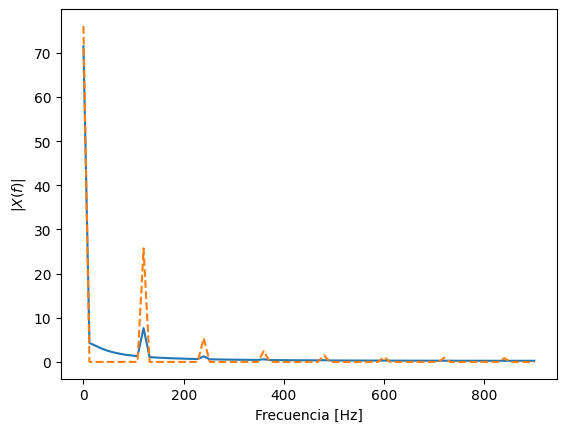

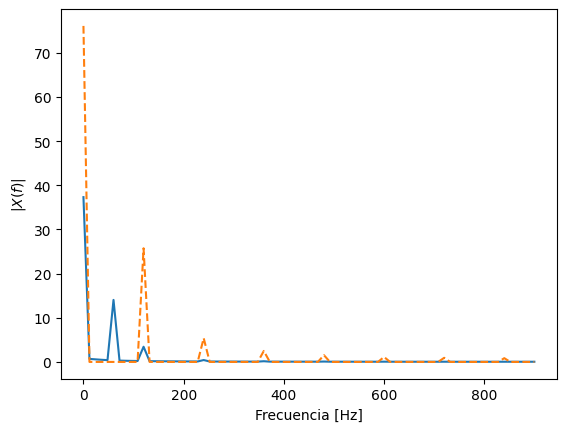

In [68]:
R_v = 1000    # Resistencia en ohmios
L_v = 5    # Inductancia en henrios

pred_freq = R / (2*np.pi * L)
print("Frecuencai de corte teórica:", pred_freq)

num = np.array([R_v/L_v]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([1,R_v/L_v])#coeficientes del denominador de la funcion de transferencia como numpy array

Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
t = np.arange(0, 5*To, 1/Fs) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))

rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)

in_ = in_o * rec_c #si se quiere probar con rec onda completa multiplicar por rec_c
in__ = in_o * rec_m #si se quiere probar con rec media onda multiplicar por rec_m

out_ = transfer_function(num,den,in_,t)
out__ = transfer_function(num,den,in__,t)

plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out_,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.legend()
plt.show()

plt.plot(t, in__,label='In(t)')#entrada rectificada
plt.plot(t, out__,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.legend()
plt.show()

vfre = np.fft.rfftfreq(len(out_),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo

Xf_ = np.fft.rfft(out_)
Xf__ = np.fft.rfft(out__)
Xf = np.fft.rfft(in_)

plt.plot(vfre,abs(Xf_/len(out_)))
plt.plot(vfre,abs(Xf/len(out_)), linestyle="--")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

plt.plot(vfre,abs(Xf__/len(out_)))
plt.plot(vfre,abs(Xf/len(out_)), linestyle="--")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

# Ejercicio


Ahora genera el programa de el circuito RLC

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjdSuCDpi2mCqg9gVEOEcmMPZO9CS5B5Rc6kS_zGQcDpxL161oJayAlqJfN7X9VjF8_YJUx5Afx883C6pZ-D4F23VtrGG3-JgBFdJOonDcZeeooOC9r4dc7FPVZCThDaUDxsNX1EuuXQnQ/w541-h275-no/" width=500>

# Filtración de Audio

In [69]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

link="https://www.youtube.com/watch?v=eP7W_YwWN28&list=RDGMEMHDXYb1_DDSgDsobPsOFxpAVMeP7W_YwWN28&start_radio=1&ab_channel=AlcolirykoZ"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

!ffmpeg -y -i audio.mp3 output.wav

     / 2.7 MB 9.7 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2024.12.13-py3-none-any.whl size=2923176 sha256=69f3bc893d9e38cac9d5ee2934a28843a4ec88c6f32d49bf237f908497edfbe3
  Stored in directory: /tmp/pip-ephem-wheel-cache-99pvkcpn/wheels/4c/91/d1/c5369304e2f7afb660bb6eee093af5a7d3c0ea05a3c1e8c797
Successfully built yt-dlp
[youtube] Extracting URL: https://www.youtube.com/watch?v=eP7W_YwWN28
[youtube] eP7W_YwWN28: Downloading webpage
[youtube] eP7W_YwWN28: Downloading ios player API JSON
[youtube] eP7W_YwWN28: Downloading mweb player API JSON
[youtube] eP7W_YwWN28: Downloading player 2f1832d2
[youtube] eP7W_YwWN28: Downloading m3u8 information
[info] eP7W_YwWN28: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    3.82MiB in 00:00:00 at 18.32MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file au

In [48]:
import soundfile as sf  # para instalar: pip install soundfile
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import scipy.signal as sig

# Nombre del archivo
nombre_out = "/content/audio.mp3"

# Parámetros de inicio y fin del fragmento (en segundos)
t_i = 30  # Tiempo de inicio (segundos)
t_o = 40  # Tiempo de finalización (segundos)

# Abrir el archivo solo para obtener la frecuencia de muestreo
with sf.SoundFile(nombre_out) as audio:
    fs = audio.samplerate  # Frecuencia de muestreo
    print(f'Frecuencia de muestreo: {fs} Hz')

    # Calcular las posiciones de inicio y final en muestras
    start_sample = int(t_i * fs)
    stop_sample = int(t_o * fs)

    # Leer solo el fragmento deseado
    audio.seek(start_sample)  # Mover el puntero al inicio
    fragment = audio.read(frames=stop_sample - start_sample)

# Mostrar información del fragmento
print(f"Fragmento leído: {len(fragment)} muestras")

# Escuchar el audio extraído
ipd.Audio(fragment.T, rate=fs)

Frecuencia de muestreo: 48000 Hz
Fragmento leído: 480000 muestras


<class 'numpy.ndarray'>


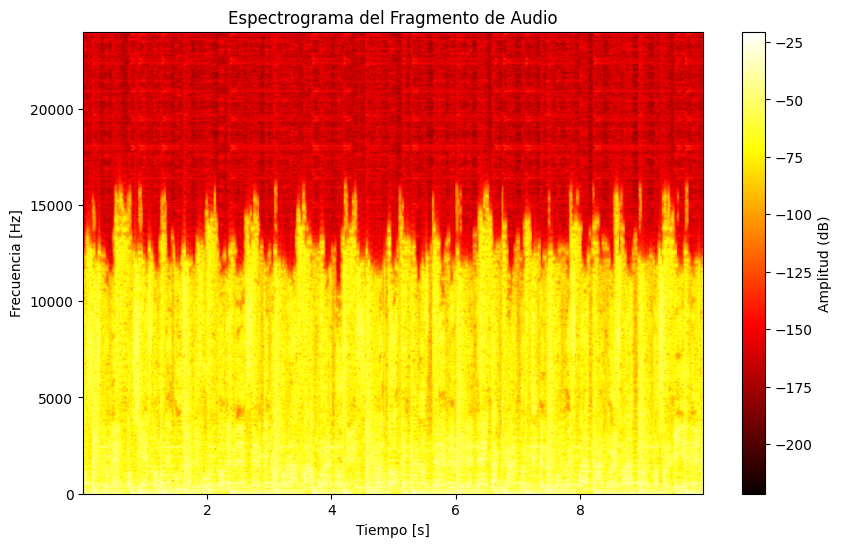

In [49]:
x_full = fragment.copy()

x = np.mean(x_full, axis=1) #Pasar a mono
print(type(x))

t = np.arange(0, len(x)/fs, 1/fs)


# Calcular el espectrograma
f, t_spec, Sxx = sig.spectrogram(x, fs=fs, nperseg=1024)

# Visualizar el espectrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud', cmap='hot')  # Espectrograma en dB
plt.colorbar(label='Amplitud (dB)')
plt.title('Espectrograma del Fragmento de Audio')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.ylim(0, fs // 2)  # Limitar a la mitad de la frecuencia de muestreo
plt.show()

In [50]:
# Filtro RC para R = 1000

def RC_filter(fc, x, t):
    R = 1000
    C =  1/(2*np.pi*fc*R)
    num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
    den = np.array([R*C,1])#coeficientes del denominador de la funcion de transferencia como numpy array
    G_n = sig.TransferFunction(num, den)
    xout = G_n.output(x, T=t)[1]
    return xout

xout = RC_filter(200, x, t)

ipd.Audio(xout.T, rate=fs)

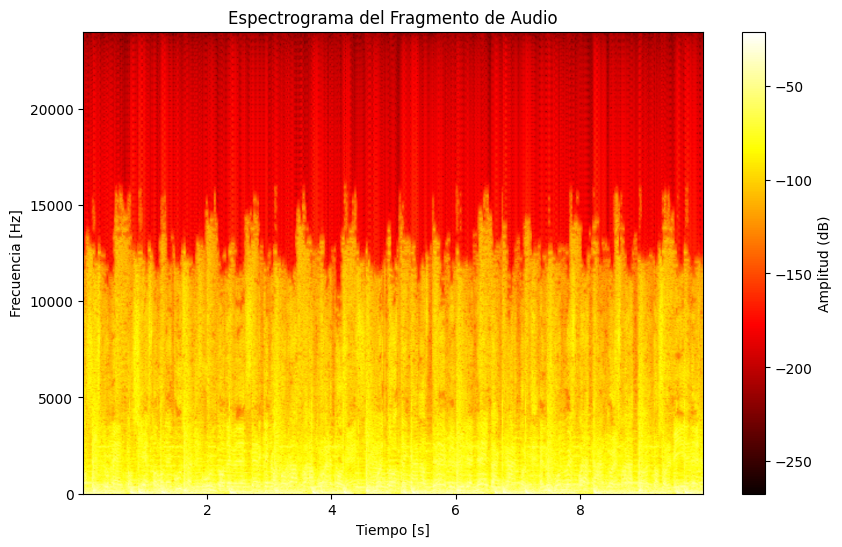

In [51]:
# Calcular el espectrograma
f, t_spec, Sxx = sig.spectrogram(xout, fs=fs, nperseg=1024)

# Visualizar el espectrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud', cmap='hot')  # Espectrograma en dB
plt.colorbar(label='Amplitud (dB)')
plt.title('Espectrograma del Fragmento de Audio')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.ylim(0, fs // 2)  # Limitar a la mitad de la frecuencia de muestreo
plt.show()

In [ ]:
t, imp = sig.impulse()

plt.plot(t, imp)
plt.xlim(0,0.01)